## Problem Statement
 - To build machine learning models using Naive Bayes Classifier and KNN Classifier, and predict whether the cancer type is Malignant or Benign.

## About dataset
- Source:https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
- The dataset used is publicly available and was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. 
- Breast cancer is the most common cancer amongst women in the world. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
- As data scientists we need to do the analysis and build a classification model to classify the tumors into maligant (cancerous) or bengin(non cancerous)

- This dataset consists of 31 columns,
   - Target variable 'diagnosis'- Benign or Malignant
   - Raduis mean
   - Texture mean
   - Perimeter mean and so on

## Agenda

- Importing Libraries and dataset
- Basic data exploration
- Data preparation
- Train-Test Split
- Scaling of x_data Feature's
- Building Naive Bayes Classification model
- Evaluating the model
- Building KNN Classification model
- Evaluating the model
- Finding Optimal K value for KNN model
- Comparison of the results

## Import required libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

## Load the dataset

In [ ]:
## If using google colab

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
#df.head()

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Explore the data

In [6]:
# lets check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- The dataset has 569 rows and 32 columns
- Most of the columns dataype is Float
- 'diagnosis' column is our target and dataype is object
- 'id' is the unique identifier

In [7]:
#Checking the statistical summary 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Checking null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

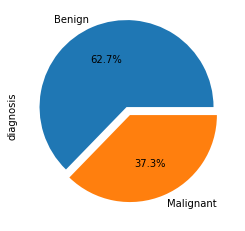

In [10]:
# Let us first analyze the distribution of the target variable
df['diagnosis'].value_counts().plot(kind='pie', labels=['Benign','Malignant'], autopct='%1.1f%%',explode=[0.1,0])
plt.show()

- We have 62.7% records as Bengin(non cancerous) and 37.3% as Malignant(cancerous) 

## Data Preparation for model building

In [11]:
# Lets drop the redundant columns which are not useful for model buidling
df.drop('id',axis=1,inplace=True)

In [12]:
# Now, malignant tumors will be assigned a value of ‘1’ and benign tumors will be assigned a value of ‘0’.
df['diagnosis'] = [1 if i== "M" else 0 for i in df['diagnosis']]

In [13]:
## We encoded our target variable successfully, where 0=Bengin and 1=Malignant
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Split and Scale the dataset

In [14]:
## separate independent and target variable
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

## Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

## Scaling the data using standard scalar
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(398, 30) (171, 30)
(398,) (171,)


## Naive Bayes Classification model

In [15]:
# Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. 
# To fit the model, we pass x_train and y_train.
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

## Evaluate the model

In [ ]:
## compute y predicted labels
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

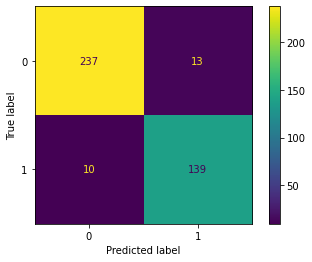

In [ ]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       250
           1       0.91      0.93      0.92       149

    accuracy                           0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399



In [ ]:
## accuracy
print('accuracy:',accuracy_score(Y_test,y_pred_gnb))

accuracy: 0.9423558897243107


## KNN Classification model

In [ ]:
## Fit the KNN classifier model to the train dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

## Evaluate the model

In [ ]:
## compute y predicted labels
y_pred_knn = knn.predict(X_test)
y_pred_knn[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

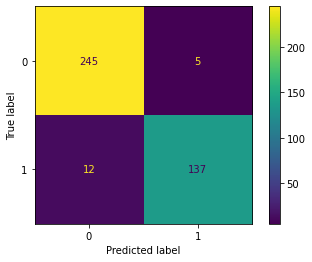

In [ ]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       250
           1       0.96      0.92      0.94       149

    accuracy                           0.96       399
   macro avg       0.96      0.95      0.95       399
weighted avg       0.96      0.96      0.96       399



In [ ]:
## accuracy
print('accuracy:',accuracy_score(Y_test,y_pred_knn))

accuracy: 0.9573934837092731


## Choosing optimal K value
- In KNN Choice of k is very critical. A small value of k means that noise will have a higher influence on the result. A large value makes it computationally expensive and is contradictory to the basic idea behind KNN, that close points might have similar densities or classes.The default parameter for the number of neighbors k is 5.

In [ ]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

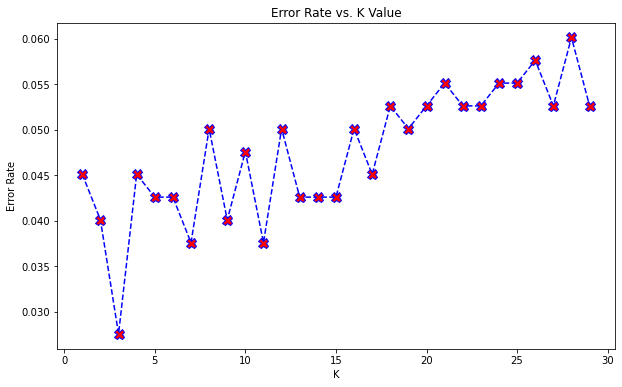

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

From the above plot, we can observe that the error is lowest 3 neigbours, lets build KNN classifier using this K value and compare the accuracy

In [ ]:
## Model 2: KNN classfier with optimal K=3
knn_three = KNeighborsClassifier(n_neighbors=3)
knn_three.fit(X_train,Y_train)

## y predicted
y_pred_knn_three = knn_three.predict(X_test)

## accuracy
print('accuracy (k=3):',accuracy_score(Y_test,y_pred_knn_three))

accuracy (k=3): 0.9724310776942355


In [ ]:
### Comparison of all the three KNN classification models
print('accuracy (default K):',accuracy_score(Y_test,y_pred_knn))
print('accuracy (k=3)      :',accuracy_score(Y_test,y_pred_knn_three))

accuracy (default K): 0.9573934837092731
accuracy (k=3)      : 0.9724310776942355


We can observe that when we built models using the optimal k value (having least error rate), the model accuracy is increased by 1 - 2% 

## Comparison of Naive Bayes and KNN Classifier models

In [ ]:
### Comparison of Naive bayes classifier model and KNN classfier model 
print('Naive Bayes model - accuracy:',accuracy_score(Y_test,y_pred_gnb))
print('KNN with optimal K - accuracy:',accuracy_score(Y_test,y_pred_knn_three))

Naive Bayes model - accuracy: 0.9423558897243107
KNN with optimal K - accuracy: 0.9724310776942355


-----
## Happy Learning:)
----